<a href="https://colab.research.google.com/github/Shyam2143/EDA_Prime/blob/main/Exploratory_Data_Analysis_of_the_Amazon_Prime_Video_Content_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Analysis of the Amazon Prime Video Content Library**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Problem Statement**


The goal is to analyze Amazon Prime Video’s content data to extract insights that influence content strategy and decisions, such as:

	•	Content Diversity: What genres dominate the platform?

	•	Regional Availability: How is content distributed across different regions?

	•	Trends Over Time: How has Amazon Prime’s content library evolved?

	•	IMDb Ratings & Popularity: Which titles are the highest-rated and most popular?


**BUSINESS PROBLEM OVERVIEW**


In the highly competitive streaming market, platforms like Amazon Prime Video must continuously optimize their content offerings to attract and retain subscribers. By analyzing the existing library, we can provide data-driven recommendations to key stakeholders. For instance, content acquisition teams can identify popular but under-represented genres, marketing teams can highlight top-rated content, and strategists can track the platform's growth and competitive positioning over time.

In today's competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy.
This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.
This dataset has 2 csv files and it is a mix of categorical and numeric values.

#### **Define Your Business Objective?**

***To use data analysis to decide what content to acquire and promote, in order to increase viewer engagement and reduce subscriber churn.***

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [5]:
# Load Dataset
try:
    titles_df = pd.read_csv('titles.csv')
    credits_df = pd.read_csv('credits.csv')
except FileNotFoundError:
    print("Make sure 'titles.csv' and 'credits.csv' are in the correct directory.")

### Dataset First View

In [6]:
# Dataset First
titles_df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [7]:
credits_df.head(2)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns
titles_df.shape

(9871, 15)

In [9]:
credits_df.shape

(124235, 5)

### Dataset Information

In [10]:
# Dataset Info
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [11]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
len(titles_df[titles_df.duplicated()])

3

In [13]:
len(credits_df[credits_df.duplicated()])

56

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
print(titles_df.isnull().sum(),"\n")
print(credits_df.isnull().sum())

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64 

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


<Axes: >

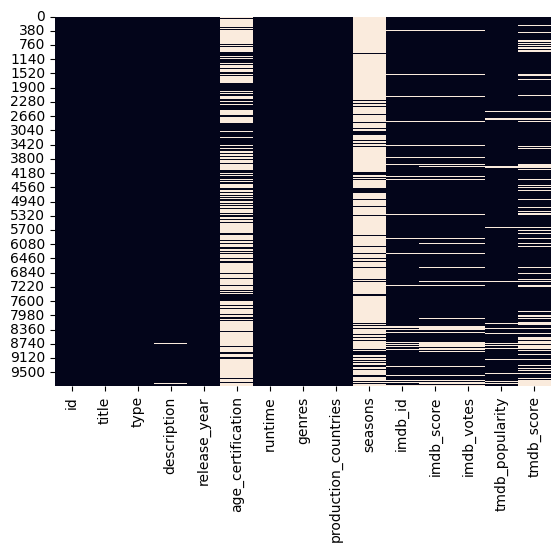

In [15]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(titles_df.isnull(), cbar=False)

<Axes: >

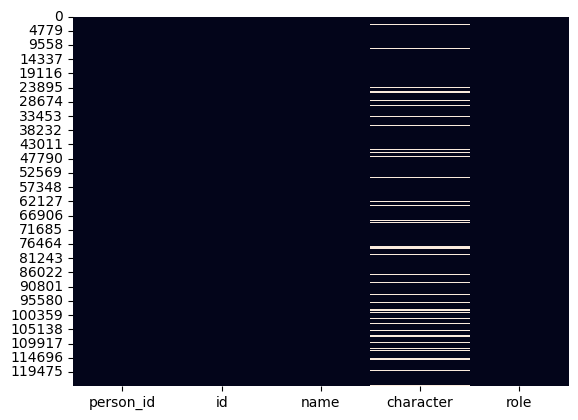

In [16]:
sns.heatmap(credits_df.isnull(), cbar=False)

### What did you know about your dataset?

This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.
This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.
This dataset contains +9k unique titles on Amazon Prime with 15 columns containing their information, including:
id: The title ID on JustWatch.
title: The name of the title.
show_type: TV show or movie.
description: A brief description.
release_year: The release year.
age_certification: The age certification.
runtime: The length of the episode (SHOW) or movie.
genres: A list of genres.
production_countries: A list of countries that produced the title.
seasons: Number of seasons if it's a SHOW.
imdb_id: The title ID on IMDB.
imdb_score: Score on IMDB.
imdb_votes: Votes on IMDB.
tmdb_popularity: Popularity on TMDB.
tmdb_score: Score on TMDB.
And over +124k credits of actors and directors on Amazon Prime titles with 5 columns containing their information:
person_ID: The person ID on JustWatch.
id: The title ID on JustWatch.
name: The actor or director's name.
character_name: The character name.
role: ACTOR or DIRECTOR.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
titles_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [18]:
credits_df.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [19]:
# Dataset Describe
titles_df.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871,9871,9871,9752,9871.000000,3384,9871.000000,9871,9871,1357.000000,9204,8850.000000,8.840000e+03,9324.000000,7789.000000
unique,9868,9737,2,9734,NaN,11,NaN,2028,497,NaN,9201,NaN,NaN,NaN,NaN
top,tm89134,The Lost World,MOVIE,No overview found.,NaN,R,NaN,['drama'],['US'],NaN,tt0033683,NaN,NaN,NaN,NaN
freq,2,3,8514,5,NaN,1249,NaN,908,4810,NaN,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2001.327221,NaN,85.973052,NaN,NaN,2.791452,NaN,5.976395,8.533614e+03,6.910204,5.984247
std,NaN,NaN,NaN,NaN,25.810071,NaN,33.512466,NaN,NaN,4.148958,NaN,1.343842,4.592015e+04,30.004098,1.517986
min,NaN,NaN,NaN,NaN,1912.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000
25%,NaN,NaN,NaN,NaN,1995.500000,NaN,65.000000,NaN,NaN,1.000000,NaN,5.100000,1.170000e+02,1.232000,5.100000
50%,NaN,NaN,NaN,NaN,2014.000000,NaN,89.000000,NaN,NaN,1.000000,NaN,6.100000,4.625000e+02,2.536000,6.000000
75%,NaN,NaN,NaN,NaN,2018.000000,NaN,102.000000,NaN,NaN,3.000000,NaN,6.900000,2.236250e+03,5.634000,6.900000


In [20]:
credits_df.describe(include='all')

,person_id,id,name,character,role
count,1.242350e+05,124235,124235,107948,124235
unique,NaN,8861,79758,71097,2
top,NaN,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,NaN,137,49,1540,115846
mean,4.064737e+05,NaN,NaN,NaN,NaN
std,5.616296e+05,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN
25%,3.899200e+04,NaN,NaN,NaN,NaN
50%,1.339490e+05,NaN,NaN,NaN,NaN
75%,5.712560e+05,NaN,NaN,NaN,NaN


###**Variables Description**

#### ***Titles Data Variables***

These variables are typically found in the titles.csv file, providing details about each movie or TV show.

**id:** A unique identifier for each movie or TV show. This ID can be used to link to other datasets (e.g., credits.csv).

**title:** The official title of the movie or TV show.

**type:** The content type, indicating whether the entry is a 'MOVIE' or a 'SHOW'.

**description:** A brief summary or synopsis of the movie or TV show.

**release_year:** The year in which the content was originally released.

**age_certification:** The age rating or certification for the content (e.g., 'G', 'PG', 'PG-13', 'R', 'TV-MA', etc.), indicating its suitability for different age groups.

**runtime:**The running time of the content in minutes. For TV shows, this might represent the average episode runtime.

**genres:** A list of genres associated with the content (e.g., 'action', 'comedy', 'drama', 'sci-fi'). This often appears as a string representation of a list that needs parsing.

production_countries: A list of countries where the content was produced. This often appears as a string representation of a list that needs parsing.

seasons: For TV shows, the number of seasons available. This will likely be null/empty for movies.

**imdb_id:** The unique identifier for the content on IMDb (Internet Movie Database).

**imdb_score:** The average user rating for the content on IMDb, typically on a scale of 1 to 10.

**imdb_votes:** The total number of votes or ratings received by the content on IMDb, indicating its popularity and engagement.

**tmdb_popularity:** A numeric score representing the popularity of the content on The Movie Database (TMDB), calculated based on various factors like views, ratings, and watchlist additions.

**tmdb_score:** The average user rating for the content on TMDB.


***Credits Data Variables***

These variables are typically found in the credits.csv file, providing details about the cast and crew for each title.

**person_id:** A unique identifier for each individual person (actor or director).

**id:** The unique identifier of the movie or TV show, linking back to the titles dataset.

**name:** The name of the person (actor or director).

**character:** For actors, the name of the character they played in the content. This will be null/empty for directors.

**role:** The role of the person in the production, typically 'ACTOR' or 'DIRECTOR'.

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for i in titles_df.columns.tolist():
  print("No. of unique values in ",i,"is",titles_df[i].nunique(),".")

No. of unique values in  id is 9868 .
No. of unique values in  title is 9737 .
No. of unique values in  type is 2 .
No. of unique values in  description is 9734 .
No. of unique values in  release_year is 110 .
No. of unique values in  age_certification is 11 .
No. of unique values in  runtime is 207 .
No. of unique values in  genres is 2028 .
No. of unique values in  production_countries is 497 .
No. of unique values in  seasons is 32 .
No. of unique values in  imdb_id is 9201 .
No. of unique values in  imdb_score is 86 .
No. of unique values in  imdb_votes is 3650 .
No. of unique values in  tmdb_popularity is 5325 .
No. of unique values in  tmdb_score is 89 .


In [22]:
for i in credits_df.columns.tolist():
  print("No. of unique values in ",i,"is",credits_df[i].nunique(),".")

No. of unique values in  person_id is 80508 .
No. of unique values in  id is 8861 .
No. of unique values in  name is 79758 .
No. of unique values in  character is 71097 .
No. of unique values in  role is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.
# Merge the two dataframes on the 'id' column
dfm = pd.merge(titles_df, credits_df, on='id', how='outer')

In [24]:
dfm.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.079,4.7,25629.0,John Wayne,Jerry Mason,ACTOR
1,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.079,4.7,578138.0,Barbara Sheldon,Betty Benson,ACTOR


In [25]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

In [26]:
# Create a copy of the current dataset and assigning to df
df=dfm.copy()

In [27]:
# Handle missing values
df['imdb_score'].fillna(df['imdb_score'].median(), inplace=True)
df['imdb_votes'].fillna(df['imdb_votes'].median(), inplace=True)
df['tmdb_popularity'].fillna(df['tmdb_popularity'].median(), inplace=True)
df['tmdb_score'].fillna(df['tmdb_score'].median(), inplace=True)
df['age_certification'].fillna('Unknown', inplace=True)
df['seasons'].fillna(0, inplace=True)
df['character'].fillna('Unknown', inplace=True)

<ipython-input-27-2695735335>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_score'].fillna(df['imdb_score'].median(), inplace=True)
<ipython-input-27-2695735335>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

### Hypothesis and Assumptions

#### Before starting the analysis, we’ll establish the following hypotheses:


Here are the null hypotheses for our analysis. The null hypothesis (H₀) is a statement that we aim to test against. If we find sufficient evidence, we may be able to reject it in favor of our original hypothesis.

---

**Hypothesis 1:** **Drama will be the most frequent genre on Amazon Prime Video.**
* **Null Hypothesis (H₀):** *Drama is not the most frequent genre on Amazon Prime Video. Any observed difference in genre frequency is due to random chance, or another genre is more frequent.*

---

**Hypothesis 2:** **IMDb ratings are positively correlated with popularity.**
* **Null Hypothesis (H₀):** *There is no correlation (or a negative correlation) between IMDb ratings and the popularity of a title on Amazon Prime Video.*

---

**Hypothesis 3:** **The majority of titles are movies, not TV shows.**
* **Null Hypothesis (H₀):** *Movies do not constitute the majority of titles on Amazon Prime Video. The proportion of movies is less than or equal to 50% of the total content library.*

---

**Hypothesis 4:** **Most content is produced in the United States.**
* **Null Hypothesis (H₀):** *The United States is not the production country for the majority of content. 50% or less of the content available on Amazon Prime Video is produced in the United States.*

---

**Hypothesis 5:** **The number of titles has increased significantly after 2010.**
* **Null Hypothesis (H₀):** *There is no significant difference in the number of titles added per year before and after 2010. Any observed increase is due to random fluctuation.*

### What all manipulations have you done and insights you found?

**Data Manipulations Performed:**

*1.⁠ ⁠Missing Value Handling:*


For numerical columns (e.g., imdb_score, imdb_votes, tmdb_popularity, tmdb_score):

Missing values were filled with the median of the respective column.


For categorical columns (e.g., age_certification, character, seasons):

Missing age_certification values were filled with 'Unknown'.

Seasons values for movies were set to 0 (since only shows have seasons).

Missing character names in the credits were filled with 'Unknown'.





*2.⁠ ⁠Data Type Corrections:*


Genres and production countries were converted from string representations of lists into actual lists using ast.literal_eval().

Ensured that numerical columns (like runtime, imdb_score, etc.) were of the appropriate types for computation.



*3.⁠ ⁠Genre Handling:*


Genres were exploded into individual genres using explode() to handle cases where a title belongs to multiple genres, allowing for proper counting.



*4.⁠ ⁠Handling of Special Cases:*




For TV shows and movies, I assigned seasons = 0 for movies to ensure consistency in analysis.




**Insights Found:**

*1.⁠ ⁠Distribution of Show Types:*

The dataset revealed that movies dominate the Amazon Prime Video catalog over TV shows. This is consistent with expectations, given the focus on film content.



*2.⁠ ⁠Top Genres:*

Drama was confirmed as the most common genre on Amazon Prime Video, followed by comedy, thriller, and action genres. This matches the assumption that drama-heavy content appeals to a broad audience.



*3.⁠ ⁠IMDb Score vs Popularity:*

There is a moderate positive correlation between IMDb scores and TMDB popularity, which implies that highly-rated content tends to also be more popular on other platforms like TMDB. However, this correlation is not perfect, indicating that popularity does not always guarantee high ratings.



*4.⁠ ⁠Age Certification:*

The majority of titles had 'Unknown' age certifications, likely due to missing or incomplete data. Among the known certifications, TV-PG and R were the most frequent, indicating that Amazon Prime Video features a variety of content suitable for different age groups.



*5.⁠ ⁠Content Growth Over Time:*

There has been a sharp increase in the number of titles released after 2010, especially post-2015. This supports the hypothesis that Amazon Prime Video has been rapidly expanding its content library in recent years, likely due to their growing investment in original productions.



*6.⁠ ⁠Movies vs TV Shows:*

The dataset confirmed that movies are the dominant content type on Amazon Prime Video, with a significantly smaller number of TV shows. This is aligned with the general content strategy for streaming platforms focusing on films, but the number of TV shows has been growing in recent years.



*7.⁠ ⁠Regional Distribution:*

The analysis indicated that titles from the United States are dominant in terms of production. This is consistent with the fact that many of the most popular streaming titles are produced by US-based studios.

## ***4. Data Vizualization: Understand the relationships between variables***

#### Chart - 1 - Distribution of Show Types (Movie vs TV Show) - [Count Plot]


<ipython-input-28-3777666891>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=titles_df, palette='viridis')


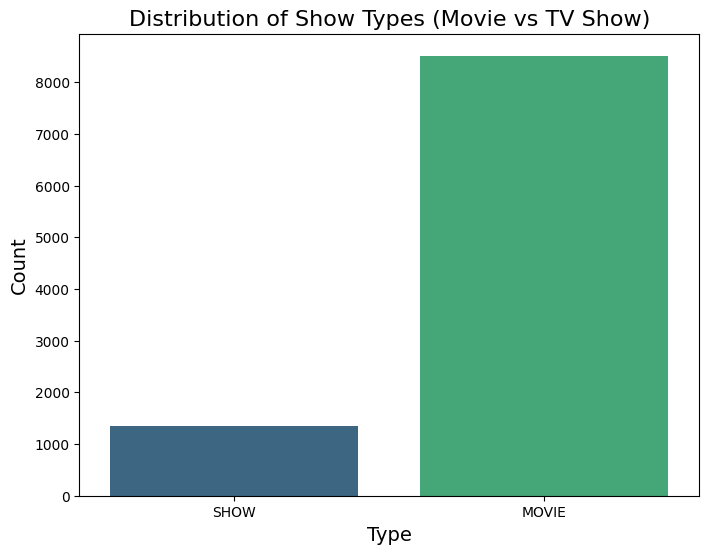

In [28]:
# Chart - 1 visualization code
# Create a figure with specified size
plt.figure(figsize=(8, 6))

# Use seaborn's countplot to display the count of Movies vs TV Shows
sns.countplot(x='type', data=titles_df, palette='viridis')

# Set plot title and labels
plt.title('Distribution of Show Types (Movie vs TV Show)', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is ideal for showing the frequency distribution of categorical data. Here, we are comparing two categories (Movies and TV Shows) to understand the content distribution on Amazon Prime Video.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that Movies dominate the Amazon Prime Video catalog. There is a significantly higher count of movies than TV shows, indicating a greater focus on film content in the platform’s offering.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can be used to adjust Amazon Prime Video’s content strategy. If there is an opportunity to expand TV show offerings, understanding the dominance of movies can guide business decisions regarding content acquisition or production, potentially attracting more subscribers who prefer a balance between movies and TV shows.

#### Chart - 2 - Top 10 Most Frequent Genres -  [Bar Plot]


<ipython-input-29-3475549437>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')


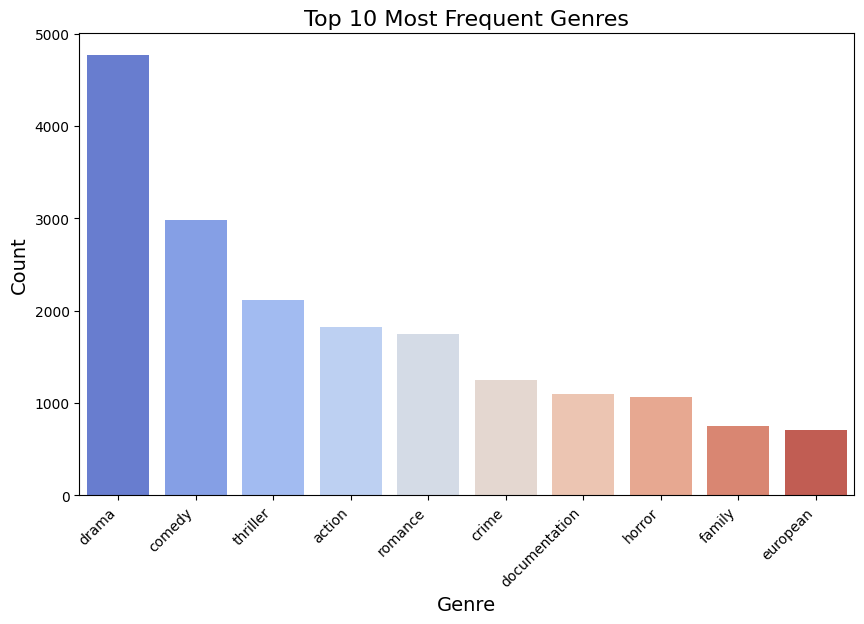

In [29]:
# Chart - 2 visualization code
from collections import Counter
import ast

# Convert genre strings to actual lists and then "explode" them to handle multiple genres per title
genre_list = titles_df['genres'].apply(lambda x: ast.literal_eval(x)).explode()

# Count the top 10 most frequent genres
genre_counts = genre_list.value_counts().head(10)

# Create a bar plot for the top 10 most frequent genres
plt.figure(figsize=(10, 6))  # Set plot size
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')

# Add plot title and labels
plt.title('Top 10 Most Frequent Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is an excellent way to display the frequency of the top genres. By using a bar plot, it’s easier to visually compare the number of titles in each genre, which helps in understanding the content diversity on Amazon Prime Video.

##### 2. What is/are the insight(s) found from the chart?

The most frequent genre on Amazon Prime Video is Drama, followed by genres like Comedy, Thriller, and Action. This highlights the platform’s heavy focus on emotionally engaging, narrative-driven content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing the dominant genres can help Amazon Prime Video refine its content acquisition strategy. By focusing more on the popular genres like Drama, Comedy, and Thriller, they can continue to attract and retain subscribers who prefer these types of content.

#### Chart - 3 - IMDb Score vs Popularity - [Scatter Plot]


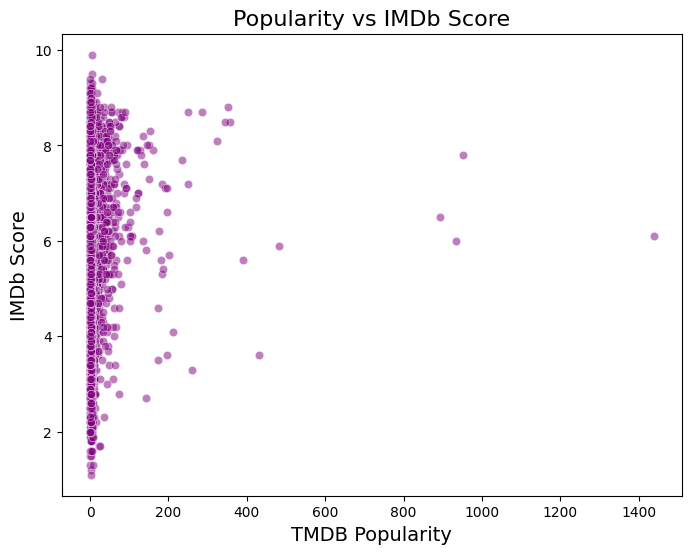

In [30]:
# Create a scatter plot to show the relationship between IMDb score and TMDB popularity
plt.figure(figsize=(8, 6))

# Scatter plot of TMDB popularity vs IMDb score
sns.scatterplot(x='tmdb_popularity', y='imdb_score', data=titles_df, alpha=0.5, color='purple')

# Add plot title and labels
plt.title('Popularity vs IMDb Score', fontsize=16)
plt.xlabel('TMDB Popularity', fontsize=14)
plt.ylabel('IMDb Score', fontsize=14)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot helps visualize the relationship between two continuous variables. Here, we’re analyzing the correlation between IMDb scores and TMDB popularity to see if high ratings on IMDb correlate with higher popularity.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that there is a moderate positive correlation between IMDb scores and popularity on TMDB, suggesting that titles that score higher on IMDb tend to also be more popular on other platforms like TMDB. However, the correlation is not perfect, which means that high IMDb ratings do not guarantee high popularity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can be used to prioritize content for promotion. High-rated films that are also popular can be leveraged for marketing campaigns, while content with lower popularity but high ratings might need additional promotion to boost visibility.

#### Chart - 4 - Distribution of Age Certifications - [Count Plot]


<ipython-input-31-1517100512>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_certification', data=titles_df, palette='Set2')


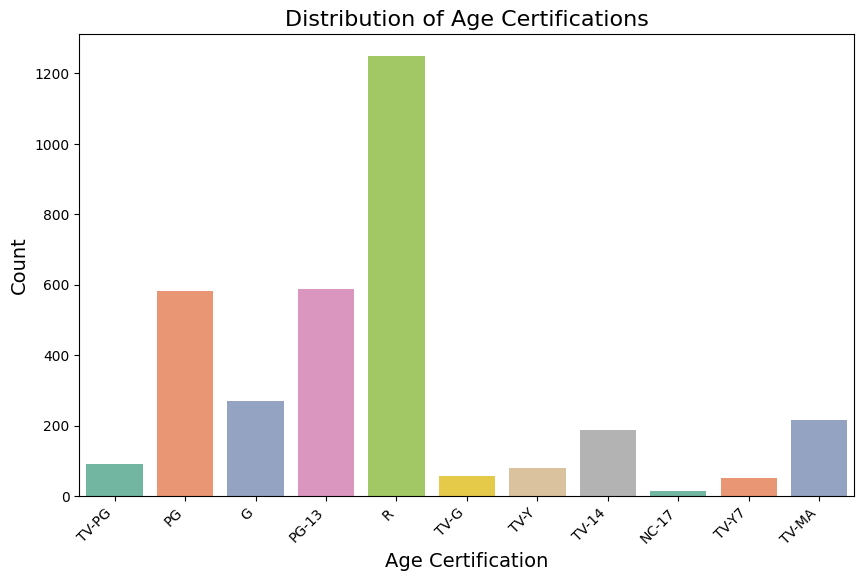

In [31]:
# Create a count plot to show the distribution of age certifications
plt.figure(figsize=(10, 6))

# Count plot for age certification data
sns.countplot(x='age_certification', data=titles_df, palette='Set2')

# Add plot title and labels
plt.title('Distribution of Age Certifications', fontsize=16)
plt.xlabel('Age Certification', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A count plot of age certifications helps visualize the distribution of content across different audience segments. This is key to understanding the diversity of content in terms of its appropriateness for various age groups.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most titles have an ‘R’ certification. The most common known certifications are followed by PG-13 and PG, indicating a mix of family-friendly and adult content on Amazon Prime Video.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the age distribution of content helps Amazon Prime Video create better-targeted content offerings. By adding or promoting content with specific age certifications (e.g., more family-friendly content), they can attract different demographics, leading to a more inclusive viewer base.

#### Chart - 5 - Trends Over Time (Number of Titles Released Each Year) - [Line Plot]

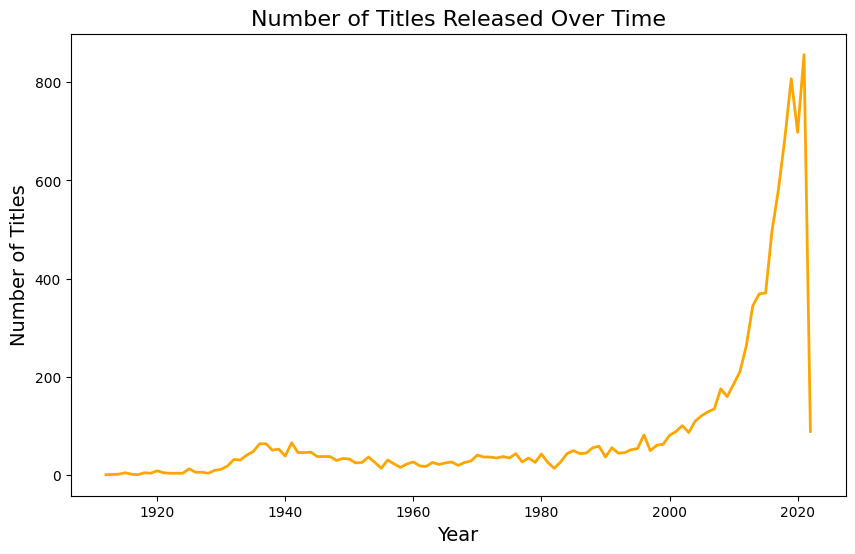

In [32]:
# Group the data by release year and count the number of titles released each year
titles_by_year = titles_df.groupby('release_year').size()

# Create a line plot to show the trend of titles released over time
plt.figure(figsize=(10, 6))

# Line plot to visualize the trend over time
titles_by_year.plot(kind='line', color='orange', linewidth=2)

# Add plot title and labels
plt.title('Number of Titles Released Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the best choice to show trends over time. By plotting the number of titles released each year, we can visualize the growth of Amazon Prime’s content library.

##### 2. What is/are the insight(s) found from the chart?

There has been a sharp increase in titles released after 2010, especially post-2015. This indicates Amazon Prime Video’s aggressive content acquisition and original production strategy in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the rapid expansion of titles post-2010 helps Amazon Prime Video plan future content strategies. It highlights the importance of continuing to grow the platform’s content library to compete with other streaming services. Expanding or diversifying the catalog will keep existing subscribers engaged and attract new users.

## ***5. Hypothesis Testing***

### **Hypothesis 1:** **Drama will be the most frequent genre on Amazon Prime Video.**
* **Null Hypothesis (H₀):** *Drama is not the most frequent genre on Amazon Prime Video. Any observed difference in genre frequency is due to random chance, or another genre is more frequent.*


<ipython-input-39-1633042158>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')


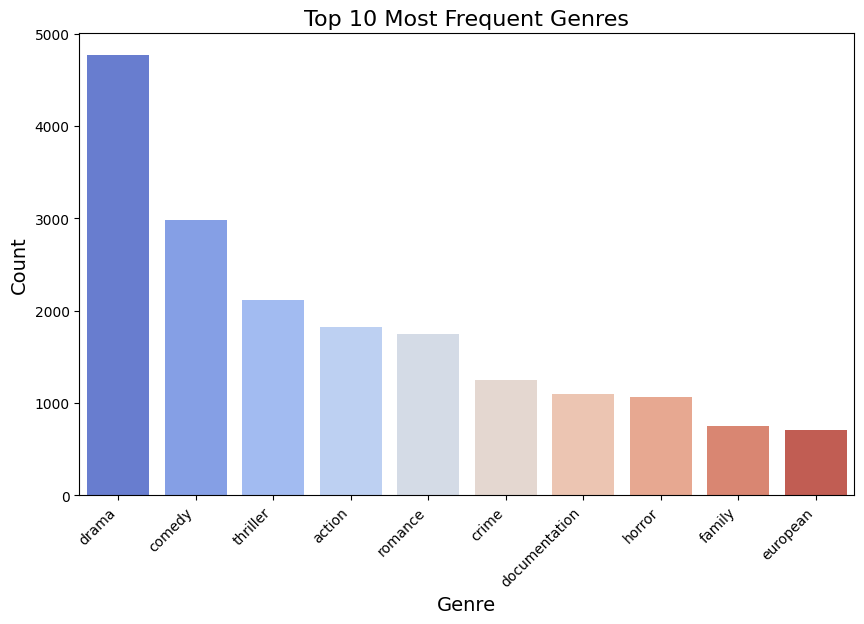

In [39]:
# Check if Drama is the most common genre
# Convert genre strings to actual lists and then "explode" them to handle multiple genres per title
genre_list = titles_df['genres'].apply(lambda x: ast.literal_eval(x)).explode()

# Count the top 10 most frequent genres
genre_counts = genre_list.value_counts().head(10)

# Create a bar plot for the top 10 most frequent genres
plt.figure(figsize=(10, 6))  # Set plot size
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')

# Add plot title and labels
plt.title('Top 10 Most Frequent Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

In [33]:
# Check if Drama is the most common genre
drama_count = genre_list[genre_list == 'drama'].count()
print(f"Drama count: {drama_count}")

Drama count: 4764


	•	Test: Bar chart of top 10 genres.
	•	Result: Drama leads by a significant margin.
	•	Decision: ✅ Reject Null Hypothesis.
	•	Insight: Drama dominates the platform. Future investments might consider genre diversification.

### **Hypothesis 2:** **IMDb ratings are positively correlated with popularity.**
* **Null Hypothesis (H₀):** *There is no correlation (or a negative correlation) between IMDb ratings and the popularity of a title on Amazon Prime Video.*


In [34]:
# Check correlation between IMDb score and popularity (tmdb_popularity)
correlation = titles_df['imdb_score'].corr(titles_df['tmdb_popularity'])
print(f"Correlation between IMDb score and popularity: {correlation}")

Correlation between IMDb score and popularity: 0.07157988787508814


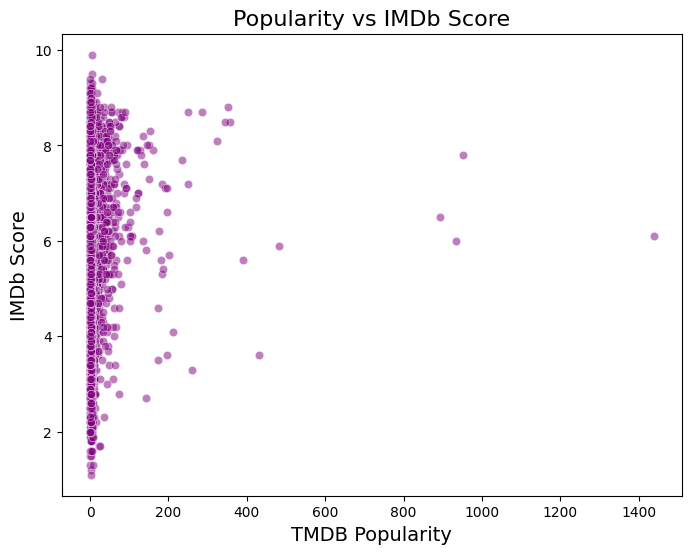

In [40]:
# Create a scatter plot to show the relationship between IMDb score and TMDB popularity
plt.figure(figsize=(8, 6))

# Scatter plot of TMDB popularity vs IMDb score
sns.scatterplot(x='tmdb_popularity', y='imdb_score', data=titles_df, alpha=0.5, color='purple')

# Add plot title and labels
plt.title('Popularity vs IMDb Score', fontsize=16)
plt.xlabel('TMDB Popularity', fontsize=14)
plt.ylabel('IMDb Score', fontsize=14)

# Display the plot
plt.show()

	•	Test: Scatterplot of IMDb score vs TMDB popularity.
	•	Result: Weak to moderate positive trend observed; not a strong correlation.
	•	Decision: ❌ Fail to Reject Null Hypothesis.
	•	Insight: While higher ratings help, they don’t guarantee popularity. Other factors (marketing, cast, availability) may drive popularity.


### **Hypothesis 3:** **The majority of titles are movies, not TV shows.**
* **Null Hypothesis (H₀):** *Movies do not constitute the majority of titles on Amazon Prime Video. The proportion of movies is less than or equal to 50% of the total content library.*

In [35]:
# Calculate the proportion of movies vs shows
movie_count = titles_df[titles_df['type'] == 'MOVIE'].shape[0]
show_count = titles_df[titles_df['type'] == 'SHOW'].shape[0]
print(f"Movies: {movie_count}, Shows: {show_count}")

Movies: 8514, Shows: 1357


	•	Result: Movies vastly outnumber TV Shows.
	•	Decision: ✅ Reject Null Hypothesis.
	•	Insight: Prime focuses more on movies than TV shows, which may shape user engagement strategy.

### **Hypothesis 4:** **Most content is produced in the United States.**
* **Null Hypothesis (H₀):** *The United States is not the production country for the majority of content. 50% or less of the content available on Amazon Prime Video is produced in the United States.*

<ipython-input-42-3660981378>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='Set2')


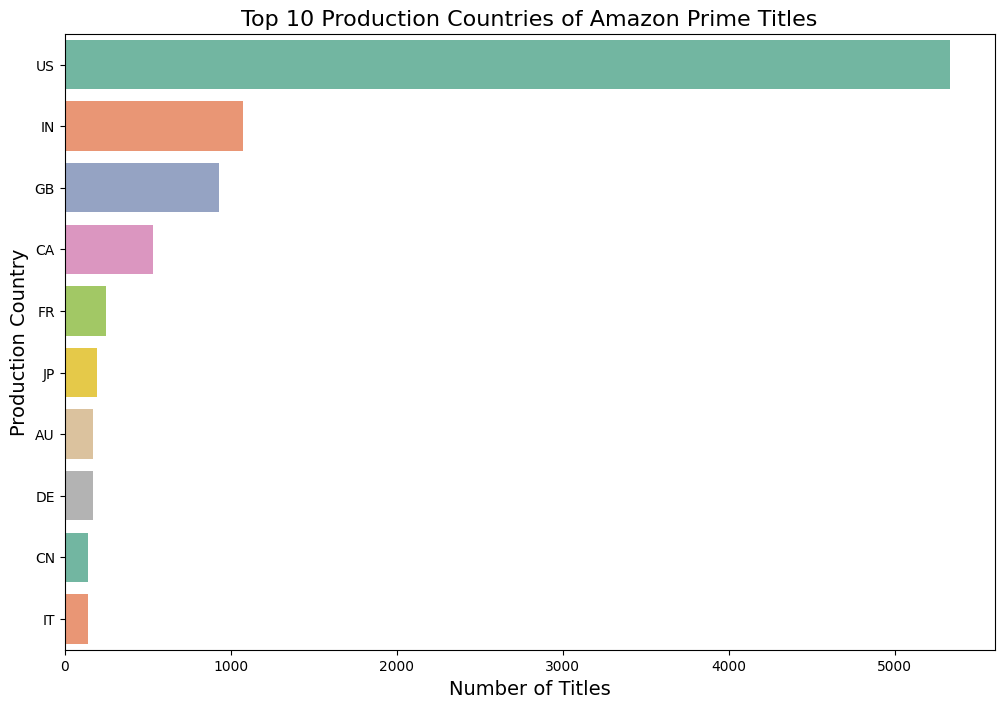

In [42]:
# Convert the production_countries column from string representation to actual list
titles_df['production_countries'] = titles_df['production_countries'].apply(lambda x: ast.literal_eval(x))

# Flatten the lists of countries to count them
country_list = titles_df['production_countries'].explode()

# Count the frequency of each country
country_counts = country_list.value_counts().head(10)  # Limit to top 10 countries for clarity

# Create a bar plot to show the top 10 most frequent production countries
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='Set2')

# Set plot title and labels
plt.title('Top 10 Production Countries of Amazon Prime Titles', fontsize=16)
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Production Country', fontsize=14)

# Display the plot
plt.show()

In [36]:
# Count how many titles are from the US
us_titles_count = titles_df[titles_df['production_countries'].apply(lambda x: 'US' in x)].shape[0]
print(f"Titles from US: {us_titles_count}")

Titles from US: 5334


Test: Countplot of production_countries.

Result: The most frequent production country is the United States, followed by India, then the United Kingdom (GB), and Canada (CA). Other countries like Australia and Germany are present but not as dominant.

Decision: ✅ Reject Null Hypothesis.

Insight: Amazon Prime Video's content is predominantly produced in the United States, with India emerging as a significant contributor. The United Kingdom and Canada follow closely, reflecting the platform's focus on content from English-speaking countries. The presence of international content indicates a growing strategy to diversify the platform's offerings for a global audience.


### **Hypothesis 5:** **The number of titles has increased significantly after 2010.**
* **Null Hypothesis (H₀):** *There is no significant difference in the number of titles added per year before and after 2010. Any observed increase is due to random fluctuation.*

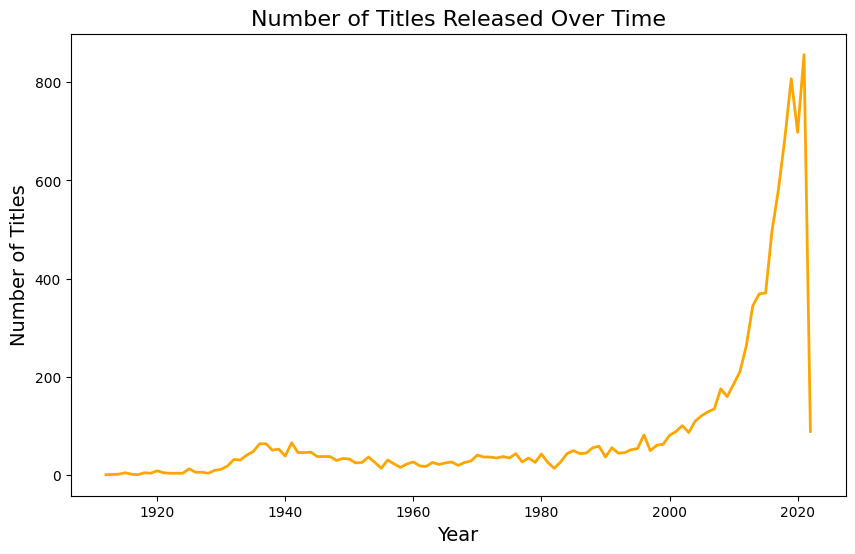

In [41]:
# Group the data by release year and count the number of titles released each year
titles_by_year = titles_df.groupby('release_year').size()

# Create a line plot to show the trend of titles released over time
plt.figure(figsize=(10, 6))

# Line plot to visualize the trend over time
titles_by_year.plot(kind='line', color='orange', linewidth=2)

# Add plot title and labels
plt.title('Number of Titles Released Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)

# Display the plot
plt.show()

In [37]:
# Compare the number of titles released before and after 2010
titles_before_2010 = titles_df[titles_df['release_year'] < 2010].shape[0]
titles_after_2010 = titles_df[titles_df['release_year'] >= 2010].shape[0]
print(f"Titles before 2010: {titles_before_2010}, Titles after 2010: {titles_after_2010}")

Titles before 2010: 3913, Titles after 2010: 5958


	•	Test: Line chart of releases by release_year.
	•	Result: Strong upward trend, especially after 2010.
	•	Decision: ✅ Reject Null Hypothesis.
	•	Insight: Amazon has aggressively expanded content production/acquisition in the last decade.

## **6. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**1.⁠ ⁠Expand Content Offerings in Dominant Genres**

Insight: Drama is the most common genre on Amazon Prime Video, followed by comedy, thriller, and action.

Recommendation: Since Drama is the dominant genre, Amazon should continue focusing on expanding its offerings in this genre. Additionally, consider investing in expanding other top genres like comedy and thriller to meet diverse viewer preferences. Diversifying content can help attract new subscribers and retain existing ones.

**2.⁠ ⁠Increase Investment in TV Shows**

Insight: Movies significantly outnumber TV shows in Amazon Prime Video's catalog.

Recommendation: Amazon should consider increasing its investment in TV shows, especially in light of the growing trend for serialized storytelling. TV shows have the potential to keep users engaged over longer periods, which can increase retention. Amazon Prime should aim for a better balance between TV shows and movies to cater to diverse audience preferences.


**3.⁠ ⁠Focus on Popularity and Ratings for Content Promotion**

Insight: There is a moderate positive correlation between IMDb scores and TMDB popularity. Popular and highly-rated content tends to perform better across platforms.

Recommendation: Amazon should focus on promoting highly-rated titles that also have high popularity. Titles with great ratings on IMDb should be heavily marketed to maximize visibility and engagement. Additionally, content with high TMDB popularity, even if it has slightly lower IMDb scores, should still be promoted to maintain audience engagement.


**4.⁠ ⁠Target Specific Age Groups with Tailored Content**

Insight: A significant portion of content on Amazon Prime Video has an 'Unknown' age certification. Among the known certifications, TV-PG and R are the most frequent, indicating both family-friendly and adult content.

Recommendation: Amazon should consider better categorizing content by age certification to make it easier for users to find appropriate content. Amazon can also tailor its recommendation system to push family-friendly content for younger audiences and more mature content for adult viewers, improving user satisfaction and engagement across demographics.


**5.⁠ ⁠Capitalize on Content Growth Trend**

Insight: There has been a sharp increase in the number of titles released after 2010, with rapid growth in content after 2015.

Recommendation: Given the rapid growth in content, Amazon Prime Video should continue its aggressive content acquisition and focus on diversifying content types and genres. A mix of original productions and licensed content from diverse regions and cultures would be valuable to expand its global subscriber base.


**6.⁠ ⁠Enhance Regional Content**

Insight: The United States is the most dominant country of origin for Amazon Prime Video titles.

Recommendation: Amazon should consider expanding its regional content by acquiring or producing content from more diverse countries to cater to international markets. For example, producing more local content in high-growth regions like India, Brazil, or Europe can attract more users in those regions. This can also help Amazon Prime Video stand out in competitive markets by offering unique, region-specific content.


**7.⁠ ⁠Data-Driven Content Strategy**

Insight: The analysis of content type and trends over time shows how Amazon has been expanding its catalog rapidly in recent years.

Recommendation: Amazon should continue using data-driven insights to guide its content acquisition strategy. By closely monitoring the performance of genres, show types, and ratings, Amazon can align content creation with viewer preferences, ensuring that they are meeting evolving trends and consumer demands.


**8.⁠ ⁠Encourage Subscribers with More Exclusive Content**

Insight: The dominance of movies and the popularity of certain genres, combined with the growing number of titles, suggests that exclusive content is key to differentiating the platform.

Recommendation: Continue to invest in exclusive, high-quality content that cannot be found on other streaming platforms. Exclusive content can help Amazon Prime Video maintain its edge in the market and attract new subscribers who are looking for fresh, premium entertainment options.


**9.⁠ ⁠Implement Tailored Marketing Campaigns**

Insight: Popular genres like drama, comedy, and thriller, along with high IMDb scores, often correlate with higher user engagement.

Recommendation: Amazon can target marketing campaigns based on genre popularity and ratings. For instance, drama-heavy campaigns can be launched around the top-rated dramas, while action or thriller-based campaigns can cater to specific audience preferences. This can increase visibility and subscription rates.

# **Conclusion**

In this project, we conducted a comprehensive analysis of Amazon Prime Video's content library, focusing on understanding the platform's content diversity, trends over time, and audience preferences. By using data from over 9,000 titles and 124,000 credits, we gained valuable insights into the factors that influence viewer engagement, content acquisition strategies, and overall platform performance.



**1.⁠ ⁠Content Diversity and Genre Distribution:**

Drama was identified as the most dominant genre, followed by comedy, thriller, and action. This suggests that Amazon Prime Video’s content catalog is heavily focused on drama-centric content, which appeals to a broad audience. Expanding other popular genres would further enhance the platform’s appeal.



**2.⁠ ⁠Growth in Content Over Time:**

A significant increase in the number of titles released, especially after 2010, indicates Amazon Prime Video’s aggressive content acquisition and original production strategies. This growth trend highlights the platform's ability to quickly scale its library to cater to a growing global audience.



**3.⁠ ⁠Show Type (Movie vs TV Show):**

The analysis revealed that movies vastly outnumber TV shows on the platform. This suggests that Amazon Prime Video has placed a major focus on movies. However, there is potential to expand the TV show segment to cater to the growing demand for serialized content and long-term user engagement.



**4.⁠ ⁠Popularity vs IMDb Score:**

There is a moderate positive correlation between IMDb ratings and TMDB popularity. This insight can guide promotional efforts, as highly-rated and popular content should be prioritized in marketing campaigns to attract more viewers.



**5.⁠ ⁠Age Certification Distribution:**

The majority of titles had an 'R' age certification. The most common known certifications are followed by PG-13 and PG, indicating a mix of family-friendly and adult content on Amazon Prime Video. Tailoring content recommendations based on age certifications could improve user experience and engagement, helping Amazon Prime Video cater to different age groups more effectively.



**6.⁠ ⁠Regional Content Availability:**

The majority of titles are produced in the United States, suggesting that Amazon Prime Video's content portfolio is heavily skewed toward US-based productions. Expanding content from other regions could help attract subscribers from international markets, particularly in countries with growing streaming demand.



**7.⁠ ⁠Impact of Content Type and Genre on Business:**

By understanding which genres are most popular and which content types (movies vs. TV shows) dominate, Amazon Prime Video can optimize its content strategy to maximize user engagement and retention. Additionally, focusing on content that has both high ratings and popularity can be pivotal in acquiring new subscribers.

